# 📌 ACTIVIDAD 4: APLICAR SVR, ÁRBOLES Y RAMDOMFOREST.

 Crea el notebook saa_u03_p01_a4-<tus_iniciales>.ipynb donde entregar esta actividad. Intenta
encontrar un modelo regresor basado en SVR o CART o RandomForestRegressor de sklearn.ensemble
que mejore los resultados del tasador de pisos que elegiste en una práctica de la unidad anterior.

ENTREGA 8:

Muestra código y capturas de ejecución de configuración y medición de desempeño con
gráficos de:

 a) Un regresor con
SVM.

 b) Un regresor basado en árboles de decisión.

 c) Un regresor basado en
RandomForestRegressor o e GradientBoostingRegressor.

 En alguno de ellos muestra importancia o influencia de cada característica usada.

## 1. Cargar liberías

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## 2. Carga de datos

In [24]:
# Usa el dataset que elegiste en la unidad anterior
df = pd.read_excel('../../U2_AprendizajeSupervisado/recursos/datos_viviendas.xlsx')
display(df.head())
# Preprocesamiento mínimo
df = df.dropna()
X = df.drop('josrosrod_precio', axis=1)  # reemplaza 'precio' con la variable objetivo
y = df['josrosrod_precio']


,josrosrod_origen,jorosrod_municipio,josrosrod_dia,josrosrod_mes,josrosrod_año,ricmirber_longitud,josrosrod_lat,josrosrod_precio,alvbelnav_iluminacion,davsoreng_duplex,...,rafmaralf_baños,luctarcom_orientacion,samartlop_superficie,davroctau_planta,juamarxxx_trastero,robripcon_habitaciones,omapasvac_ascensor,elilopper_distanciaCentro,rauramesc_airecentral,guifue_parking
0,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.395,39.418,140000.0,Alta,0.0,...,1.0,Sureste,81.0,1.0,1.0,3.0,1.0,6.0,1.0,0.0
1,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.398,39.417,85000.0,Alta,0.0,...,1.0,Este,161.0,1.0,0.0,1.0,0.0,7.0,1.0,0.0
2,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.3987,39.4149,225000.0,Alta,0.0,...,2.0,Este,179.0,1.0,1.0,3.0,0.0,6.0,1.0,0.0
3,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.399,39.4145,129999.0,Alta,0.0,...,1.0,Sur,89.0,2.0,0.0,3.0,1.0,6.0,0.0,0.0
4,Fotocasa,Benetuser,16.0,2.0,2025.0,-0.3985,39.4133,145000.0,Baja,0.0,...,1.0,Oeste,55.0,1.0,0.0,1.0,1.0,6.0,1.0,0.0


## 3. División en entrenamiento y prueba

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Copia del dataset original para no modificarlo directamente
X_encoded = X.copy()

# Detectamos columnas categóricas y aplicamos LabelEncoder
label_encoders = {}
for col in X_encoded.select_dtypes(include=['object']).columns:
    X_encoded[col] = X_encoded[col].astype(str)
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=675)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## a) SVR

SVR R2: -0.042727252712867037
SVR RMSE: 79241981074.16624


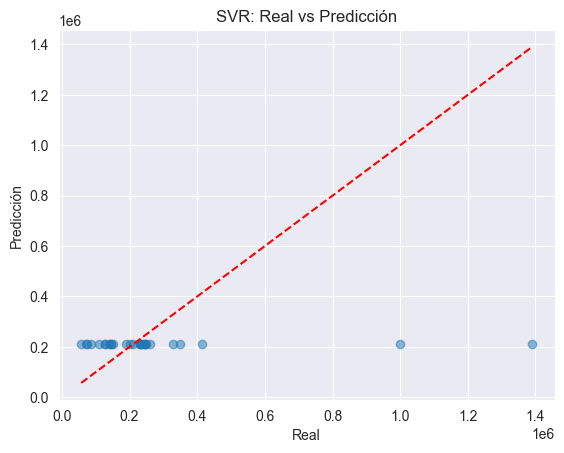

In [26]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

# Métricas
print("SVR R2:", r2_score(y_test, y_pred_svr))
print("SVR RMSE:", mean_squared_error(y_test, y_pred_svr))

# Gráfico de predicción
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.title("SVR: Real vs Predicción")
plt.show()


## b) Árbol de decisión

Árbol R2: 0.47227824079417036
Árbol RMSE: 40104176376.53257


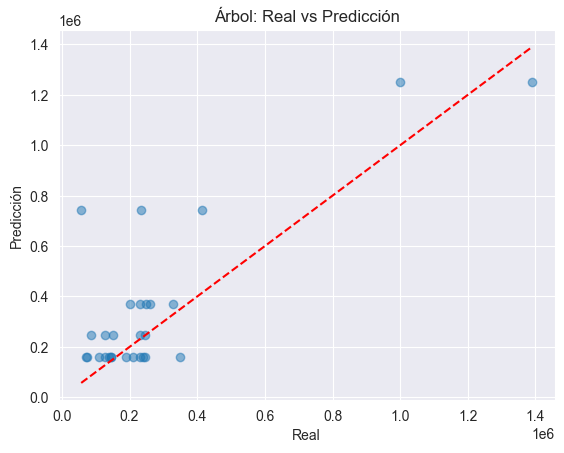

In [27]:
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Árbol R2:", r2_score(y_test, y_pred_tree))
print("Árbol RMSE:", mean_squared_error(y_test, y_pred_tree))

plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.title("Árbol: Real vs Predicción")
plt.show()


## c) RandomForestRegressor o GradientBoostingRegressor

RandomForest R2: 0.7848951221896024
RandomForest RMSE: 16346879408.84393


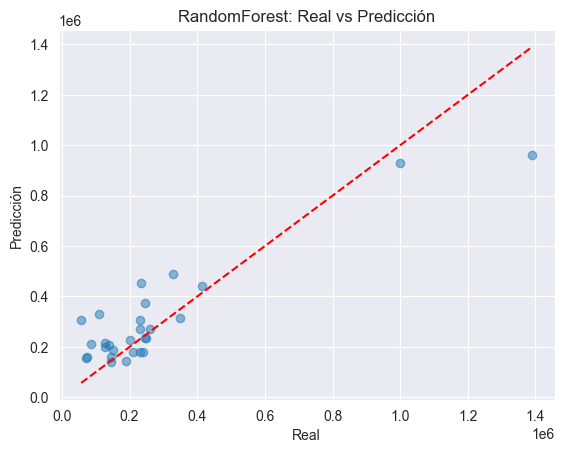

In [28]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=675)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("RandomForest R2:", r2_score(y_test, y_pred_rf))
print("RandomForest RMSE:", mean_squared_error(y_test, y_pred_rf))

plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.title("RandomForest: Real vs Predicción")
plt.show()

## 4. Comparación final

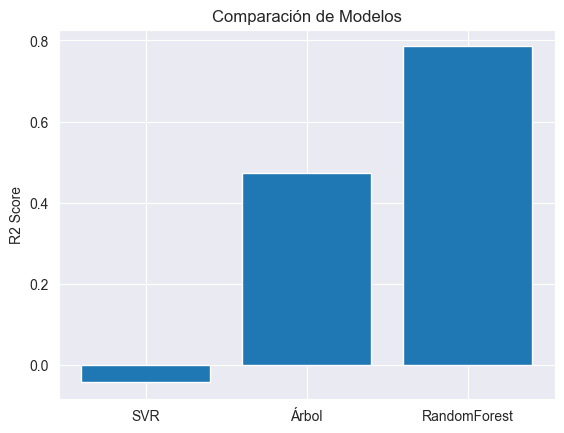

In [29]:
modelos = ['SVR', 'Árbol', 'RandomForest']
r2_scores = [
    r2_score(y_test, y_pred_svr),
    r2_score(y_test, y_pred_tree),
    r2_score(y_test, y_pred_rf)
]

plt.bar(modelos, r2_scores)
plt.ylabel("R2 Score")
plt.title("Comparación de Modelos")
plt.show()